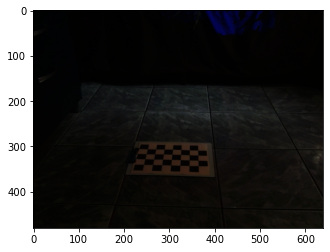

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
img = cv2.imread('opencv2.png')
plt.imshow(img)

In [2]:
ret= 3.2584167918449385

mtx= np.array([[758.3623328,    0. ,        320],
 [  0. ,        277.0752992,  240 ],
 [  0. ,          0. ,          1.        ]])
dist= np.array([-0.37108555, -0.55196761, -0.05971178,  0.05019456,  1.50333278])
rvecs= np.array([[-0.32828217],
       [-0.24557222],
       [ 0.2705811 ]])
tvecs= np.array([[ 0.47712872],
       [18.09944781],
       [29.39689676]])

In [3]:
img2 = cv2.drawFrameAxes(img,mtx,dist,rvecs,tvecs,3)

(480, 640, 3)


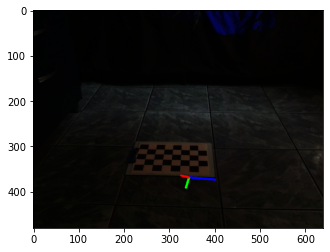

In [4]:
plt.imshow(img2)
print(np.shape(img2))

In [25]:
rot_t = np.array([[1,0,0,0],[0,1,0,0],[0,0,1,0]])
pixels = np.array([[240],[320],[1]])
P = mtx@rot_t
print(np.shape(pixels))
print(np.shape(np.linalg.inv(mtx)))
world =np.linalg.inv(mtx)@pixels
print(world)

(3, 1)
(3, 3)
[[-0.10549047]
 [ 0.28873018]
 [ 1.        ]]


In [5]:
f = 3.67 #(mm)
sx = 3.98 * 10**(-3) #(mm)
sy = 3.98 * 10**(-3)
cx = 320
cy = 240
import math as mt
def get_2d(u,v):
    h_cam = 60 #(cm)
    x = (v-cx)*sx
    y = (u-cy)*sy
    theta_x = mt.atan(x/f)
    theta_y = mt.atan(y/f)
    if(theta_x*180/mt.pi) >= 90:
        print('angulo invalido')
    return theta_x, theta_y

def get_d_ball(theta_x):
    alpha = mt.pi - theta_x
    d_ball = mt.tan(alpha) * h_cam